#  Wrangle & Analyze "WeRateDogs" Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering Data</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a>
<li><a href="#storing">Storing, Analysing and Visualising Data </li></ul>

<a id='intro'></a>
## Introduction
The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

<a id='#gathering'></a>
## Gathering Data

__1. Twitter archive file__
<br>Udacity provided the data which is a CSV file named as twitter-archive-enhanced.csv and is downloaded manually from the resources.

In [77]:
#Importing all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from functools import reduce
from datetime import datetime
import tweepy 
import json 
import re
import seaborn as sns

# pandas settings
pd.set_option('display.max_colwidth', None)

In [78]:
# loading twitter archive
twitter_archive = pd.read_csv('M:/Udacity/twitter-archive-enhanced.csv',encoding='utf-8')
# Using tweet id column as index
twitter_archive.set_index("tweet_id", inplace = True)

In [79]:
# printing out a few lines
twitter_archive.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [80]:
#The dimensions of the dataset
twitter_archive.shape

(2356, 16)

__2. Tweet image prediction__
<br>The tweet image predictions: i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [81]:
#Downloading URL programatically 
# getting file with the image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)

# loading image predictions
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
# using tweet id column as index
image_prediction.set_index("tweet_id", inplace = True)
# displaying few lines
image_prediction.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


__3. Twitter API File__

Twitter API file contains tweet id, favorite count and retweet count. Udacity provided this data which was downloaded manually then loaded from the tweet-json.txt file into a pandas data frame.

In [82]:
# loading twitter API data
with open('M:/Udacity/tweet_json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

# changing column names
twitter_api.columns = ['tweet_id', 'favorite_count', 'retweet_count']
# using tweet id column as index
twitter_api.set_index('tweet_id', inplace = True)
# printing few lines
twitter_api.head()

,favorite_count,retweet_count
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


__Final Gathered Data__
<br>twitter_archive - This is a dataset "twitter-archive-enhanced.csv" which was converted into a dataframe and gives information on basic tweet data.
<br>
<br>twitter_api - This dataset will contain information regarding tweet_id, no of retweets and no of favorites.
<br>
<br>image_predictions - This dataset will contain information about predictions about the image.

<a id='#assessing'></a>
## Assessing Data

Assessing data visually as well as programmatically using pandas for quality and tidiness issues.
<br>This twitter dataset comes in three tables that we need to acquaint ourselves with thorough visual assessment as below.

In [83]:
twitter_archive.head(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [84]:
# this will display a concise summary of the dataframe,
# including the number of non-null values in each column

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   in_reply_to_status_id       78 non-null     float64
 1   in_reply_to_user_id         78 non-null     float64
 2   timestamp                   2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  fl

__Description of all the columns:__
<br>__tweet_id__: the unique identifier for each of the tweet
<br>__in_reply_to_status_id__: the status id for the reply given to the tweet id
<br>__in_reply_to_user_id__: the status id for the reply given to the tweet id ( w.r.t user id)
<br>__timestamp__: Date and time the tweet was created, in Excel-friendly format.
<br>__source__: the web link as source
<br>__text__: the corresponding tweets text
<br>__retweeted_status_id__: the status id for the reply given to the tweet id i.e., for the retweeted id
<br>__retweeted_status_user_id__: the status id for the reply given to the tweet id ( w.r.t user id) i.e., for the retweeted id
<br>__retweeted_status_timestamp__: Date and time the tweet was created, in Excel-friendly format.
<br>__expanded_urls__: Expanded version of url1; URL entered by user and displayed in Twitter. Note that the user-entered URL may itself be a shortened URL, e.g. from bit.ly.
<br>__rating_numerator__: the ranking given by the user
<br>__rating_denominator__: The reference ranking given by the user
<br>__name__: the breed or dog's name
<br>__doggo, floofer, pupper, puppo__ -- The stage of the dog

In [85]:
#Checking the descriptive statistics 
twitter_archive.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [86]:
# checking if tweet_ids are unique
twitter_archive.index.is_unique

True

In [87]:
#Checking the rating values for numerator 
twitter_archive['rating_numerator'].value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [88]:
# checking rating values for denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [89]:
# checking ratings with denominator greather than 10
twitter_archive[twitter_archive.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
tweet_id,,
832088576586297345,@docmisterio account started on 11/15/15,15
820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90


In [90]:
# check for any float ratings in the text column
with pd.option_context('max_colwidth', None):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['text', 'rating_numerator', 'rating_denominator']])

C:\Users\mugdh\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [91]:
for i, text in twitter_archive['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        print (text)

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [92]:
# checking expanded urls
twitter_archive[~twitter_archive.expanded_urls.str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].sample(3)[['text','expanded_urls']]

,text,expanded_urls
tweet_id,,
766714921925144576,His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley,NaN
855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN
845397057150107648,"Say hello to Mimosa. She's an emotional support doggo who helps her owner with PTSD. 13/10, but she needs your help\n\nhttps://t.co/L6mLzrd7Mx https://t.co/jMutBFdw5o","https://www.gofundme.com/help-save-a-pup,https://twitter.com/dog_rates/status/845397057150107648/photo/1,https://twitter.com/dog_rates/status/845397057150107648/photo/1"


In [93]:
# checking for two or more urls in the expanded urls
twitter_archive[twitter_archive.expanded_urls.str.contains(',', na = False)].expanded_urls.count()

639

In [94]:
# checking if dogs have more than one category assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twitter_archive[category] = twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)

twitter_archive['number_categories'] = twitter_archive.loc[:,categories].sum(axis = 1)

In [95]:
# dogs categories
twitter_archive['number_categories'].value_counts()

0    1976
1     366
2      14
Name: number_categories, dtype: int64

In [96]:
# checking count of retweets
np.isfinite(twitter_archive.retweeted_status_id).sum()

181

In [97]:
# checking name of dog
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
            ... 
Mosby          1
Alejandro      1
Timmy          1
Ben            1
Wiggles        1
Name: name, Length: 957, dtype: int64

In [98]:
#checking for names 
len(twitter_archive.query('name in ["a", "an", "the", "such"]'))

71

### __Assessing : Image Predictions__

In [99]:
# displaying few samples of data
image_prediction.sample(5)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
680801747103793152,https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg,1,pug,0.996720,True,Labrador_retriever,0.001439,True,Staffordshire_bullterrier,0.000518,True
668274247790391296,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,1,soft-coated_wheaten_terrier,0.406374,True,Lakeland_terrier,0.263854,True,toy_poodle,0.150844,True
810284430598270976,https://pbs.twimg.com/media/Cz61ZD4W8AAcJEU.jpg,1,malamute,0.620768,True,Eskimo_dog,0.158395,True,Tibetan_mastiff,0.028962,True
667793409583771648,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,1,dalmatian,0.535073,True,English_setter,0.451219,True,Great_Dane,0.008164,True
672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True


In [27]:
#dimensions of the dataset
image_prediction.shape

(2075, 11)

In [100]:
# this will display a concise summary of the dataframe,
# including the number of non-null values in each column

image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jpg_url  2075 non-null   object 
 1   img_num  2075 non-null   int64  
 2   p1       2075 non-null   object 
 3   p1_conf  2075 non-null   float64
 4   p1_dog   2075 non-null   bool   
 5   p2       2075 non-null   object 
 6   p2_conf  2075 non-null   float64
 7   p2_dog   2075 non-null   bool   
 8   p3       2075 non-null   object 
 9   p3_conf  2075 non-null   float64
 10  p3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


__Description of columns__
<br>__tweet_id__: tweet_id is the last part of the tweet URL after "status/"
<br>__jpg_url__: Image link or URL
<br>__img_num__: Image number
<br>__p1__: p1 is the algorithm's #1 prediction for the image in the tweet
<br>__p1_conf__: p1_conf is how confident the algorithm is in its #1 prediction
<br>__p1_dog__: p1_dog is whether or not the #1 prediction is a breed of dog
<br>__p2__: is the algorithm's second most likely prediction
<br>__p2_conf__: is how confident the algorithm is in its #2 prediction
<br>__p2_dog__: is whether or not the #2 prediction is a breed of dog
<br>__p3__: p3 is the algorithm's #3 prediction for the image in the tweet
<br>__p3_conf__: p3_conf is how confident the algorithm is in its #3 prediction
<br>__p3_dog__: p3_dog is whether or not the #3 prediction is a breed of dog

In [101]:
# Checking jpg_url for duplicates
sum(image_prediction.jpg_url.duplicated())

66

In [102]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### __Assessing : Twitter API Data__

In [103]:
# printing few samples of data
twitter_api.sample(3)

,favorite_count,retweet_count
tweet_id,,
793241302385262592,11780,3812
813187593374461952,22085,5096
670792680469889025,889,298


In [104]:
# this will display a concise summary of the dataframe,
# including the number of non-null values in each column

twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   favorite_count  2354 non-null   int64
 1   retweet_count   2354 non-null   int64
dtypes: int64(2)
memory usage: 55.2 KB


In [105]:
# checking if all ids are unique
twitter_archive.index.is_unique

True

## Quality Issues
#### Twitter archive 

<li>Some of the gathered tweets are replies
<li>The gathered tweets consists of few retweets
<li>There are many columns in this dataframe making it hard to read, and some will not be needed for analysis
<li>The timestamp has an incorrect datatype - is an object, should be DateTime
<li>Rating numerator and rating denominator have some inconsistent values in the numerator and denominator (some of them showing as high as 1776, 170 respectively
<li>There are 639 expanded urls which contain more than one url address
<li>There are rows whose name is ' a, an, the, such'


#### Image Prediction
<li>Column names are misleading and do not convey information of the content
<li>p1, p2, and p3 contain underscores instead of spaces in the labels
<li>Image urls are duplicated
<li>There are 2356 tweets in the twitter archieve dataframe and 2075 rows in the images predictions dataframe. This could mean that there is missing data, or that not all 2356 of the tweets had pictures.

#### Twitter API data
<li>Twitter archive dataset has 2356 entries, while Twitter API data has 2354

## Tidiness Issues
#### Twitter archive 
<li>Dog 'stage' classification has multiple columns(doggo, floofer, pupper or puppo) instead of one column
   

#### Image Prediction
<li> Image prediction data should be merged with the twitter archive data as they provide information about the same tweet

#### Twitter API data
<li>Twitter API data should be combined with the twitter archive data as they have information about the same tweet

<a id='#cleaning'></a>
## Cleaning Data

<br> We will now clean the quality and tidiness issues listed earlier in the Assessing data section using pandas

In [106]:
# Making copies of all the dataframes for cleaning

twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
twitter_api_clean = twitter_api.copy()

###  Twitter Archive Data

In [107]:
twitter_archive_clean.head(3)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,0,0,0,0,0
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,0,0,0,0,0
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,0,0,0,0,0


### Define

<li>Some of the gathered tweets are retweets and replies

<li>Columns with retweet and replies information should be removed

### Code

In [108]:
# droping retweets                                                 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

### Test

In [109]:
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


### Define
Drop unnecessary columns which we don't need for further analysis

### Code

In [110]:
# display all columns
twitter_archive_clean.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'number_categories'],
      dtype='object')

In [111]:
# drop unnecessary columns
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [112]:
# printing shape of dataframe
twitter_archive_clean.shape

(2175, 12)

In [113]:
# printing few samples of cleaned dataset
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,
673688752737402881,2015-12-07 02:21:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Larry. He doesn't know how to shoe. 9/10 damn it Larry https://t.co/jMki5GOV3y,https://twitter.com/dog_rates/status/673688752737402881/photo/1,9,10,Larry,0,0,0,0,0
838083903487373313,2017-03-04 17:49:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Daisy. She's puppears to be rare as all h*ck. Only seven like her currently domesticated. 13/10 pettable af https://t.co/meUc8jufAO,"https://twitter.com/dog_rates/status/838083903487373313/photo/1,https://twitter.com/dog_rates/status/838083903487373313/photo/1",13,10,Daisy,0,0,0,0,0
686034024800862208,2016-01-10 03:57:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Your fav crew is back and this time they're embracing cannabis culture. 12/10 for all https://t.co/oSvRDuMm1D,https://twitter.com/dog_rates/status/686034024800862208/photo/1,12,10,None,0,0,0,0,0


### Define

<br>Dog classification (doggo, floofer, pupper or puppo) should be one column.
Some dogs have more than one category assigned.
<br>We can extract the dog stages from the 'text' column into the new 'dog_stage' column and then drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns. 

In [114]:
# Extract dog stages from 'text' column into new 'dog_stage' column 
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [115]:
# Checking few rows of dog_stage if they are similar to what was previously extracted
twitter_archive_clean[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].sample(15)

,dog_stage,doggo,floofer,pupper,puppo
tweet_id,,,,,
689280876073582592,NaN,0,0,0,0
741793263812808706,NaN,0,0,0,0
759099523532779520,NaN,0,0,0,0
696894894812565505,NaN,0,0,0,0
679530280114372609,NaN,0,0,0,0
672248013293752320,NaN,0,0,0,0
789628658055020548,NaN,0,0,0,0
687312378585812992,pupper,0,0,1,0
840696689258311684,NaN,0,0,0,0


In [116]:
# droping old columns
twitter_archive_clean.drop(['puppo',
                       'pupper',
                       'doggo',
                       'floofer'],
                      axis=1, inplace=True)

### Test

In [117]:
# Checking for presence of 'dog_stage" and absence of 'doggo', 'floofer', 'pupper', and 'puppo'
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   timestamp           2175 non-null   object
 1   source              2175 non-null   object
 2   text                2175 non-null   object
 3   expanded_urls       2117 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   number_categories   2175 non-null   int64 
 8   dog_stage           364 non-null    object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


### Define
<br>The timestamp has an incorrect datatype - is an object, should be DateTime.

### Code

In [118]:
# converting to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

### Test

In [119]:
# printing dataset types
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2175 non-null   datetime64[ns, UTC]
 1   source              2175 non-null   object             
 2   text                2175 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   number_categories   2175 non-null   int64              
 8   dog_stage           364 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 169.9+ KB


### Define
<br>Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly read as 5/10 from the text. We need to find all such instances and correct the rating value

In [120]:
# Disply a sample before correction
twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+')][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10,75
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,10,26
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,10,5


### Code

In [121]:
# convert both columns to floats
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

In [122]:
# find columns with fractions
fraction_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extract correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', twitter_archive_clean.loc[index,:].text).group(0)
    twitter_archive_clean.at[index,'rating_numerator'], twitter_archive_clean.at[index,'rating_denominator'] = rating.split('/')

In [123]:
# display sample of fixed data
twitter_archive_clean.loc[fraction_ratings,:][['text', 'rating_numerator','rating_denominator']].sample(3)

,text,rating_numerator,rating_denominator
tweet_id,,,
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0


### Define
<br>Denominator of some ratings is not 10. Numerator of some ratings is greater than 10. So, it is confusing to interpret unstandardized ratings.It could be interesting to see what % are below or above 100% and this can be changed by introducing a single value for rating.

### Code

In [124]:
# Calulating value of 'rating'
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

In [125]:
# displaying sample of data with the new column
twitter_archive_clean[['text','rating_numerator', 'rating_denominator', 'rating']].sample(5)

,text,rating_numerator,rating_denominator,rating
tweet_id,,,,
696405997980676096,This is Berb. He just found out that they have made 31 Kidz Bop CD's. Downright terrifying. 7/10 hang in there Berb https://t.co/CIFLjiTFwZ,7.0,10.0,0.7
764259802650378240,This is Kota and her son Benedict. She doesn't know why you're staring. They are a normal family. Both 10/10 https://t.co/Q1v9BZylvZ,10.0,10.0,1.0
815990720817401858,Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p,11.0,10.0,1.1
675878199931371520,"Ok, I'll admit this is a pretty adorable bunny hopping towards the ocean but please only send in dogs... 11/10 https://t.co/sfsVCGIipI",11.0,10.0,1.1
806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,11.0,10.0,1.1


### Define

There are 639 expanded urls which contain more than one url address and 59 missing expanded urls

### Code

In [126]:
# fix expanded urls
for index, column in twitter_archive_clean.iterrows():
    twitter_archive_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)


### Test 

In [127]:

twitter_archive_clean.sample(4)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_stage,rating
tweet_id,,,,,,,,,,
672980819271634944,2015-12-05 03:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Extraordinary dog here. Looks large. Just a head. No body. Rather intrusive. 5/10 would still pet https://t.co/ufHWUFA9Pu,https://twitter.com/dog_rates/status/672980819271634944,5.0,10.0,None,0,NaN,0.5
823322678127919110,2017-01-23 00:13:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wyatt. He's got the fastest paws in the West. H*ckin deadly. 11/10 would ride into the sunset with https://t.co/stkJ377KK7,https://twitter.com/dog_rates/status/823322678127919110,11.0,10.0,Wyatt,0,NaN,1.1
827933404142436356,2017-02-04 17:34:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kona. Yesterday she stopped by the department to see what it takes to be a police pupper. 12/10 vest was only a smidge too big https://t.co/j8D3PQJvpJ,https://twitter.com/dog_rates/status/827933404142436356,12.0,10.0,Kona,1,pupper,1.2
891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688,13.0,10.0,Darla,0,NaN,1.3


### Clean: Image Predictions Data

In [128]:
image_prediction_clean.head(5)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
Column names are misleading and do not convey information of the content

### Code

In [129]:
# change labels
image_prediction_clean.columns = ['image_url', 
                            'img_number', 
                            'prediction_1',
                            'prediction_1_confidence',
                            'prediction_1_isdog',
                            'prediction_2',
                            'prediction_2_confidence',
                            'prediction_2_isdog',
                            'prediction_3',
                            'prediction_3_confidence',
                            'prediction_3_isdog']

### Test

In [130]:
#displaying columns with new labels
image_prediction_clean.columns

Index(['image_url', 'img_number', 'prediction_1', 'prediction_1_confidence',
       'prediction_1_isdog', 'prediction_2', 'prediction_2_confidence',
       'prediction_2_isdog', 'prediction_3', 'prediction_3_confidence',
       'prediction_3_isdog'],
      dtype='object')

### Define
Dog breeds contain underscores, and have improper case formatting

### Code


In [131]:
# columns with dog breed
dog_breed_cols = ['prediction_1', 'prediction_2', 'prediction_3']

# removing underscore and capitalizing the first letter of each word 
for column in dog_breed_cols:
    image_prediction_clean[column] = image_prediction_clean[column].str.replace('_', ' ').str.title()

### Test

In [132]:
image_prediction_clean[dog_breed_cols]

,prediction_1,prediction_2,prediction_3
tweet_id,,,
666020888022790149,Welsh Springer Spaniel,Collie,Shetland Sheepdog
666029285002620928,Redbone,Miniature Pinscher,Rhodesian Ridgeback
666033412701032449,German Shepherd,Malinois,Bloodhound
666044226329800704,Rhodesian Ridgeback,Redbone,Miniature Pinscher
666049248165822465,Miniature Pinscher,Rottweiler,Doberman
...,...,...,...
891327558926688256,Basset,English Springer,German Short-Haired Pointer
891689557279858688,Paper Towel,Labrador Retriever,Spatula
891815181378084864,Chihuahua,Malamute,Kelpie


### Define

There are 66 image_urls which are duplicated and need to be droppped

### Code

In [133]:
#disply jpg_url duplicates 
sum(image_prediction_clean.image_url.duplicated())

66

In [134]:
#Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['image_url'], keep='last')

### Test

In [135]:
sum(image_prediction_clean['image_url'].duplicated())

0

### Define

Merging all the 3 dataframes- twitter_archive_clean,image_prediction_clean and twitter_api_clean

### Code

In [136]:
# merging datasets
twitter_master = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), [twitter_archive_clean, image_prediction_clean, twitter_api])

### Test

In [137]:
#displaying few samples
twitter_master.head(4)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_stage,rating,...,prediction_1_confidence,prediction_1_isdog,prediction_2,prediction_2_confidence,prediction_2_isdog,prediction_3,prediction_3_confidence,prediction_3_isdog,favorite_count,retweet_count
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193,13.0,10.0,Phineas,0,NaN,1.3,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467,8853
892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426,13.0,10.0,Tilly,0,NaN,1.3,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514
891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864,12.0,10.0,Archie,0,NaN,1.2,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328
891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688,13.0,10.0,Darla,0,NaN,1.3,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,42908,8964


## Storing

In [138]:
#Storing the clean DataFrame in a CSV file
twitter_master.to_csv('twitter_archive_master.csv')

<a id='storing'></a>
## Analyzing and Visualizing Data

It would be interesting to find account popularity over time. It will be based on the numbers of Favorites and Retweets over time.

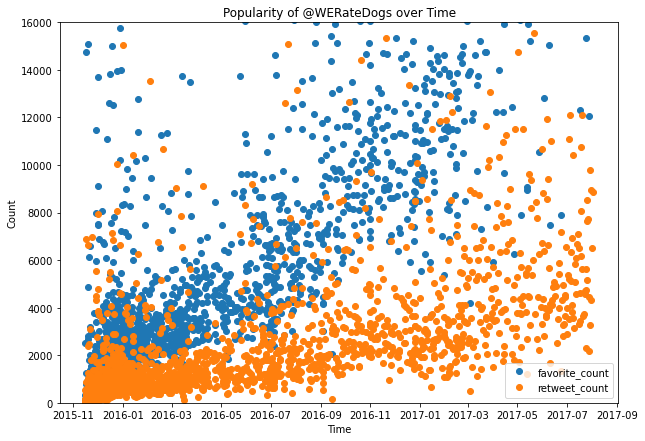

In [139]:
#Plot of Favorites and Retweets and time 
dt = pd.DataFrame(twitter_master.timestamp)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(dt,twitter_master.favorite_count,label ="favorite_count")
ax.plot_date(dt,twitter_master.retweet_count,label="retweet_count")
ax.set_ylim([0,16000])
ax.set_title('Popularity of @WERateDogs over Time')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.legend();

__We can see from the above plot that this page gained popularity over time as there us a upward trend in the count of favorites and retweets. So, as the WeRateDogs account was getting admired, the tweets had more and more favorites and retweets.__

Let's use a scatter plot to visualize the relation between Retweets and Favorites.

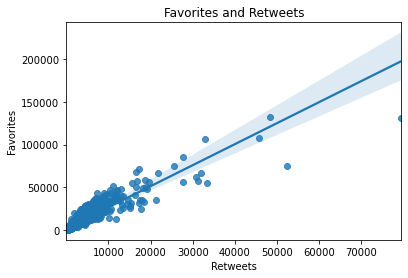

In [140]:
#Scatter plot 
graph = sns.regplot(x=twitter_master.retweet_count, y=twitter_master.favorite_count)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
# sns.plt.show()
fig = graph.get_figure()
fig.savefig('scatterplot.png')


__So, we can observe here that both the Retweets and Favorites go in sync together and are highly correlated.__

WeRateDogs classifies dogs into one of four stages: doggo, pupper, puppo, and floof(er).Let's check how many dogs we have for each category.

In [141]:
twitter_master.dog_stage.value_counts()

pupper     218
doggo       69
puppo       27
floofer      3
Name: dog_stage, dtype: int64

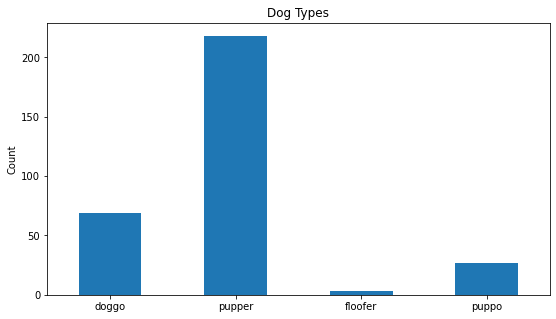

In [142]:
#Bar plot for dog types
twitter_master.dog_stage.value_counts(sort=False).plot(kind='bar',figsize=(9,5))
plt.title('Dog Types');
plt.ylabel('Count')
plt.xticks(rotation=0);


It would also be interesting to know the most popular dog breeds.
The largest number of breeds on WeRateDogs (with a confidence of more than 70% for accuracy and prediction_1 being true)

In [143]:
#Finding popular breeds 
df_dog = twitter_master.query('prediction_1_confidence >= 0.7 and prediction_1_isdog == True')
series_breeds = df_dog.prediction_1.value_counts()
series_breeds[:10]

Golden Retriever      78
Pembroke              50
Labrador Retriever    44
Pug                   34
Chihuahua             32
Pomeranian            23
Samoyed               23
Chow                  19
French Bulldog        19
Toy Poodle            15
Name: prediction_1, dtype: int64

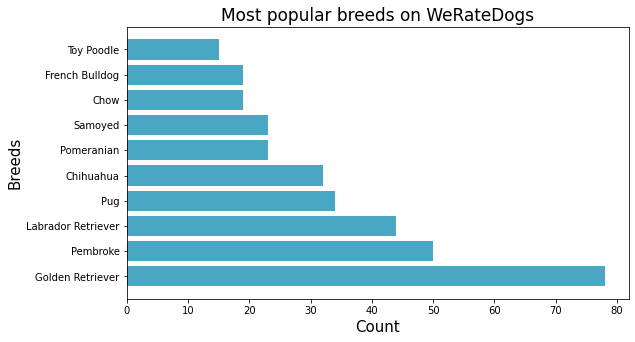

In [144]:
#Bar plot for breeds
plt.figure(figsize=(9,5));
bar_list = plt.barh(series_breeds[:10].index,series_breeds[:10], color="#49a7c3")
plt.title("Most popular breeds on WeRateDogs",fontsize=17)
plt.xlabel("Count",fontsize=15)
plt.ylabel("Breeds",fontsize=15)
plt.show()